In [4]:
from pylab import *
from scipy import special
import numpy
import csv
from IPython.display import clear_output, display
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Inputs

#Integration parameters
omega = 1
order = 2

#Number of steps
N = 150

#Timestep
delta = 2

#Mass, rotation
Param = [1, 1]
M = Param[0]

#Cartesian --> polar inputs

qcart1 = [ 0 , 0 , 8 , -20 ]
pcart1 = [ 1 , 0 , 0 , 1 ]

qcart2 = [ 0 , 0 , -8 , -20 ]
pcart2 = [ 1 , 0 , 0 , 1 ]

#Intercepts of Lines and Intercept Sensitivity

dp = 2

interceptr = []
interceptphi = []

In [6]:
qcart = qcart1
pcart = pcart1

%run InternalProcesses/GeodesicIntegrator1.0.ipynb

result = geodesic_integrator(N,delta,omega,q0,p0,Param,order=2)

measvar = 0
allrval = []
allphival = []

for stepnumber in range(N):
    subres1 = (result[stepnumber])
    subres2 = (subres1[measvar])
    
    allrval.append(subres2[1])
    allphival.append(subres2[3])
    
rval1 = []
phival1 = []
stepnum = 0

while allrval[stepnum] > 2*M and stepnum < N-1:
    rval1.append(allrval[stepnum])
    phival1.append(allphival[stepnum])
    stepnum = stepnum + 1
else:
    print('list complete')

'On iteration number 0 with delta 2'

list complete


In [7]:
qcart = qcart2
pcart = pcart2

%run InternalProcesses/GeodesicIntegrator1.0.ipynb

result = geodesic_integrator(N,delta,omega,q0,p0,Param,order=2)

measvar = 0
allrval = []
allphival = []

interceptr = []
interceptphi = []

for stepnumber in range(N):
    subres1 = (result[stepnumber])
    subres2 = (subres1[measvar])
    
    allrval.append(subres2[1])
    allphival.append(subres2[3])
    
rval2 = []
phival2 = []
stepnum = 0

while allrval[stepnum] > 2*M and stepnum < N-1:
    rval2.append(allrval[stepnum])
    phival2.append(allphival[stepnum])
    stepnum = stepnum + 1
else:
    print('Trajectories Compiled')
    
Num1 = 0
Num2 = 0
interceptr = []
interceptphi = []
dp = 2


for Num1 in range(2, len(rval1)-1, 1):
    for Num2 in range(2, len(rval2)-1, 1):
        if phival1[Num1] - phival2[Num2] < 0 and phival1[Num1-1] - phival2[Num2-1] > 0:
            if round(rval1[Num1] - rval2[Num2], dp) == 0:
                phiint = (phival1[Num1]+phival1[Num1-1])/2
                rint = (rval1[Num1]+rval1[Num1-1])/2
                for existingr in range(len(interceptr)):
                    if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                        interceptphi.append(phiint)
                        interceptr.append(rint)
                if len(interceptr) == 0:
                        interceptphi.append(phiint)
                        interceptr.append(rint)
        if phival1[Num1] - phival2[Num2] - 2*pi < 0 and phival1[Num1-1] - phival2[Num2-1] - 2*pi > 0:
            if round(rval1[Num1] - rval2[Num2], dp) == 0:
                phiint = (phival1[Num1]+phival1[Num1-1])/2
                rint = (rval1[Num1]+rval1[Num1-1])/2
                for existingr in range(len(interceptr)):
                    if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                        interceptphi.append(phiint)
                        interceptr.append(rint)
                    if len(interceptr) == 0:
                        interceptphi.append(phiint)
                        interceptr.append(rint)
        if phival1[Num1] - phival2[Num2] + 2*pi < 0 and phival1[Num1-1] - phival2[Num2-1] + 2*pi > 0: 
            if round(rval1[Num1] - rval2[Num2], dp) == 0:
                phiint = (phival1[Num1]+phival1[Num1-1])/2
                rint = (rval1[Num1]+rval1[Num1-1])/2
                for existingr in range(len(interceptr)):
                    if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                        interceptphi.append(phiint)
                        interceptr.append(rint)
                            
if len(interceptr) < 2:
    dp = dp - 1
    for Num1 in range(2, len(rval1)-1, 1):
        for Num2 in range(2, len(rval2)-1, 1):
            if phival1[Num1] - phival2[Num2] < 0 and phival1[Num1-1] - phival2[Num2-1] > 0:
                if round(rval1[Num1] - rval2[Num2], dp) == 0:
                    phiint = (phival1[Num1]+phival1[Num1-1])/2
                    rint = (rval1[Num1]+rval1[Num1-1])/2
                    for existingr in range(len(interceptr)):
                        if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
                    if len(interceptr) == 0:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
            if phival1[Num1] - phival2[Num2] - 2*pi < 0 and phival1[Num1-1] - phival2[Num2-1] - 2*pi > 0:
                if round(rval1[Num1] - rval2[Num2], dp) == 0:
                    phiint = (phival1[Num1]+phival1[Num1-1])/2
                    rint = (rval1[Num1]+rval1[Num1-1])/2
                    for existingr in range(len(interceptr)):
                        if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
                    if len(interceptr) == 0:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
            if phival1[Num1] - phival2[Num2] + 2*pi < 0 and phival1[Num1-1] - phival2[Num2-1] + 2*pi > 0: 
                if round(rval1[Num1] - rval2[Num2], dp) == 0:
                    phiint = (phival1[Num1]+phival1[Num1-1])/2
                    rint = (rval1[Num1]+rval1[Num1-1])/2
                    for existingr in range(len(interceptr)):
                        if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
                            
if len(interceptr) < 2:
    dp = dp - 1
    for Num1 in range(2, len(rval1)-1, 1):
        for Num2 in range(2, len(rval2)-1, 1):
            if phival1[Num1] - phival2[Num2] < 0 and phival1[Num1-1] - phival2[Num2-1] > 0:
                if round(rval1[Num1] - rval2[Num2], dp) == 0:
                    phiint = (phival1[Num1]+phival1[Num1-1])/2
                    rint = (rval1[Num1]+rval1[Num1-1])/2
                    for existingr in range(len(interceptr)):
                        if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
                    if len(interceptr) == 0:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
            if phival1[Num1] - phival2[Num2] - 2*pi < 0 and phival1[Num1-1] - phival2[Num2-1] - 2*pi > 0:
                if round(rval1[Num1] - rval2[Num2], dp) == 0:
                    phiint = (phival1[Num1]+phival1[Num1-1])/2
                    rint = (rval1[Num1]+rval1[Num1-1])/2
                    for existingr in range(len(interceptr)):
                        if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
                    if len(interceptr) == 0:
                            interceptphi.append(phiint)
                            interceptr.append(rint)
            if phival1[Num1] - phival2[Num2] + 2*pi < 0 and phival1[Num1-1] - phival2[Num2-1] + 2*pi > 0: 
                if round(rval1[Num1] - rval2[Num2], dp) == 0:
                    phiint = (phival1[Num1]+phival1[Num1-1])/2
                    rint = (rval1[Num1]+rval1[Num1-1])/2
                    for existingr in range(len(interceptr)):
                        if phiint - interceptphi[existingr] > 1 and rint - interceptr[existingr] > 1:
                            interceptphi.append(phiint)
                            interceptr.append(rint)

        
print('Phi intercepts:', interceptphi)
print('r intercepts:', interceptr)

initandintercepts = []
initandintercepts.append([q0[1], interceptr, interceptphi])



'On iteration number 0 with delta 2'

Trajectories Compiled
Phi intercepts: []
r intercepts: []


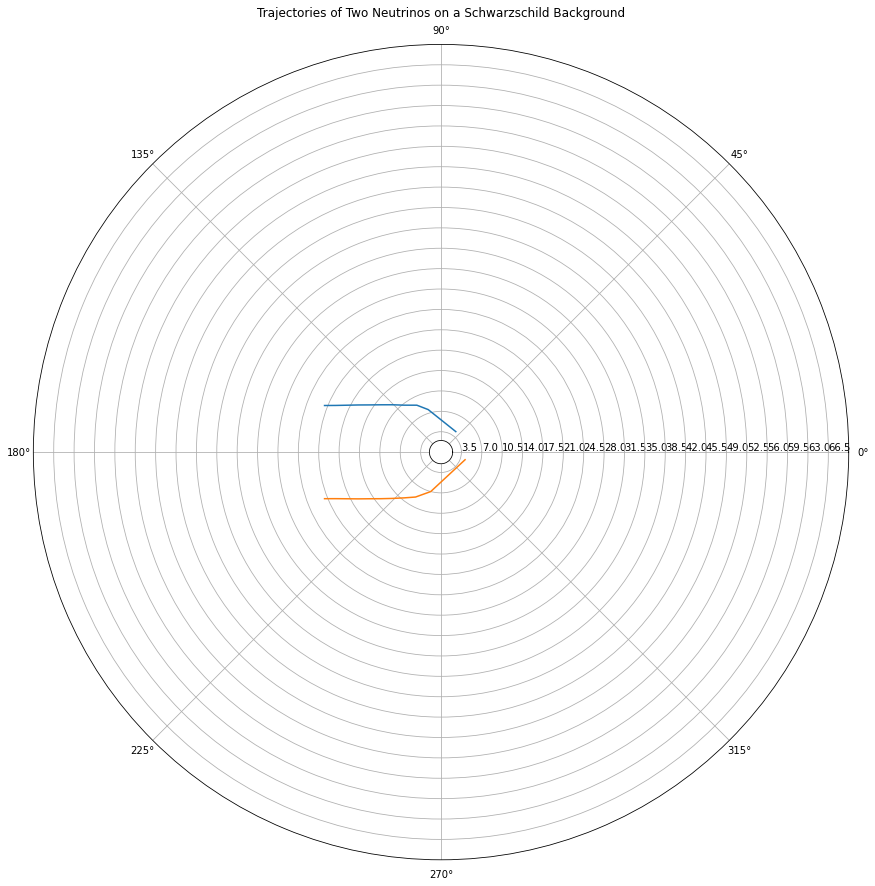

Oscillation Probabilities at intersections:  []


NameError: name 'oscprob2a' is not defined

In [8]:
pltrange = 70
ticks = []
for tick in range(20):
    tck = (pltrange/20)*tick
    ticks.append(tck)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phival1, rval1)
ax.plot(phival2, rval2)

fig.set_figwidth(15)
fig.set_figheight(15)

for interno in range(len(interceptphi)):
    ax.plot(interceptphi[interno], interceptr[interno], 'ro')
    interceptpoint = (interceptr[interno], interceptphi[interno])

ax.set_rmax(2319)
ax.set_rticks(ticks)
ax.set_rlabel_position(0)
ax.grid(True)

ax.set_ylim(2*M, pltrange)
ax.set_rorigin(0)

ax.set_title("Trajectories of Two Neutrinos on a Schwarzschild Background", va='bottom')
plt.show()

# 1, 2 are the paths
# a, b are the mass eigenstates

import scipy.integrate as integrate
import scipy.special as special

oscprobint1 = 0
oscprobint2 = 0

mixang = 1
neutrinomassa = 0.001
neutrinomassb = 0.0005

q01 = (qcart1[1]**2 + qcart1[2]**2 + qcart1[3]**2)**(1/2)
q02 = (qcart2[1]**2 + qcart2[2]**2 + qcart2[3]**2)**(1/2)

oscprobintersections = []
if Param[1] == 0:
    for intersects in range(len(interceptr)):
        oscprobint1a = integrate.quad(lambda r : ((1-(1-2*M/r)*(qcart1[2]**2/r**2))**(-1/2)), q01, interceptr[intersects])
        oscprob1a = oscprobint1a[0]*((neutrinomassa**2)/(2*(pcart1[3]**2)))
     
        oscprobint1b = integrate.quad(lambda r : ((1-(1-2*M/r)*(qcart1[2]**2/r**2))**(-1/2)), q01, interceptr[intersects])
        oscprob1b = oscprobint1b[0]*((neutrinomassb**2)/(2*(pcart1[3]**2)))

        oscprobint2a = integrate.quad(lambda r : ((1-(1-2*M/r)*(qcart2[2]**2/r**2))**(-1/2)), q02, interceptr[intersects])
        oscprob2a = oscprobint2a[0]*((neutrinomassa**2)/(2*(pcart2[3]**2)))
    
        oscprobint2b = integrate.quad(lambda r : ((1-(1-2*M/r)*(qcart2[2]**2/r**2))**(-1/2)), q02, interceptr[intersects])
        oscprob2b = oscprobint2b[0]*((neutrinomassb**2)/(2*(pcart2[3]**2)))
    
        op1a = oscprob1a
        op1b = oscprob1b
        op2a = oscprob2a
        op2b = oscprob2b
        
        oscprobintersection = (1/2)*(cos(mixang)**2)*(sin(mixang)**2)*(2+cos(op1a-op2a)+cos(op2a-op2b)-cos(op1b-op1a)-cos(op2b-op2a)-cos(op1b-op2a)-cos(op2b-op1a))
        oscprobintersections.append(oscprobintersection)

if Param[1] != 0:
    for intersects in range(len(interceptr)):
        
        oscprobint1a = (q01 + interceptr[intersects])*(1 - (qcart1[2]**2/(2*q01*interceptr[intersects])) + (2*M/(q01 + interceptr[intersects])))
        oscprob1a = -oscprobint1a[0]*((neutrinomassa**2)/(2*(pcart1[3]**2)))
     
        oscprobint1b = (q01 + interceptr[intersects])*(1 - (qcart1[2]**2/(2*q01*interceptr[intersects])) + (2*M/(q01 + interceptr[intersects])))
        oscprob1b = oscprobint1b[0]*((neutrinomassb**2)/(2*(pcart1[3]**2)))

        oscprobint2a = (q02 + interceptr[intersects])*(1 - (qcart2[2]**2/(2*q02*interceptr[intersects])) + (2*M/(q02 + interceptr[intersects])))
        oscprob2a = oscprobint2a[0]*((neutrinomassa**2)/(2*(pcart2[3]**2)))
    
        oscprobint2b = (q02 + interceptr[intersects])*(1 - (qcart2[2]**2/(2*q02*interceptr[intersects])) + (2*M/(q02 + interceptr[intersects])))
        oscprob2b = oscprobint2b[0]*((neutrinomassb**2)/(2*(pcart2[3]**2)))
    
        op1a = oscprob1a
        op1b = oscprob1b
        op2a = oscprob2a
        op2b = oscprob2b

        oscprobintersection = (1/2)*(cos(mixang)**2)*(sin(mixang)**2)*(2+cos(op1a-op2a)+cos(op2a-op2b)-cos(op1b-op1a)-cos(op2b-op2a)-cos(op1b-op2a)-cos(op2b-op1a))
        oscprobintersections.append(oscprobintersection)
    
    
if len(interceptr) == 1:    
    print('Oscillation Probability at intersections: ', oscprobintersections)
else: 
    print('Oscillation Probabilities at intersections: ', oscprobintersections)
    
print(oscprob2a)
print(oscprob1b)

In [ ]:
finalresults = []

finalresults.append(interceptr)
finalresults.append(interceptphi)
finalresults.append(oscprobintersections)

print(oscprobintersections)

differencer = []
differencephi = []

differencer1 = []
differencephi1 = []
differencer2 = []
differencephi2 = []

for rs in range(len(rval1)):
    if phival1[rs]-phival2[rs] < 2*pi:
        if phival1[rs]-phival2[rs] > -2*pi:
            differencer.append(rval1[rs]-rval2[rs])
            differencephi.append(phival1[rs]-phival2[rs])
    if phival1[rs]-phival2[rs] > 2*pi:
        differencer.append(rval1[rs]-rval2[rs])
        differencephi.append(phival1[rs]-phival2[rs]-2*pi)
    if phival1[rs]-phival2[rs] < -2*pi:
        differencer.append(rval1[rs]-rval2[rs])
        differencephi.append(phival1[rs]-phival2[rs]+2*pi)

differencer1 = []
differencephi2 = []

interceptphi.append(phiint)
interceptr.append(rint)        
        

        
print('Phi intercepts:', interceptphi)
print('r intercepts:', interceptr)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phival1, rval1)
ax.plot(phival2, rval2)

fig.set_figwidth(15)
fig.set_figheight(15)

for interno in range(len(interceptphi)):
    ax.plot(interceptphi[interno], interceptr[interno], 'ro')
    interceptpoint = (interceptr[interno], interceptphi[interno])

ax.set_rmax(20)
ax.set_rticks([4, 6, 8, 10, 12, 14, 16, 18, 20])
ax.set_rlabel_position(0)
ax.grid(True)

ax.set_ylim(2*M, 20)
ax.set_rorigin(0)

ax.set_title("Trajectories of Two Neutrinos on a Schwarzschild Background", va='bottom')
plt.show()